# RAG by Hand

## My imports

In [1]:
from langchain_community.document_loaders import PyPDFLoader
from langchain_community.document_loaders import PyMuPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter

## My documents

In [5]:
all_documents = []
file_paths = [
    "data/iss-const.pdf",
    "data/Read N Heed 2024-2025.pdf"
]

In [6]:
for file_path in file_paths:
    loader = PyMuPDFLoader(file_path)
    documents = loader.load()

    # Add metadata to each document
    for doc in documents:
        doc.metadata["source"] = file_path
        all_documents.append(doc)

In [7]:
print(len(all_documents))

41


In [75]:
#print(all_documents[0])

In [9]:
with open("data/iss-const.txt", "a") as file:
    for doc in all_documents:
        file.write(doc.page_content + "\n")  # Append each string with a newline

In [10]:
text_splitter = RecursiveCharacterTextSplitter(
    # chunk_size=200,
    # chunk_overlap=50
    chunk_size=1024,
    chunk_overlap=256,
    separators=["\n\n", "\n", " "]
)
# Split document into chunks with metadata
chunked_documents = text_splitter.split_documents(all_documents)

In [11]:
print(type(chunked_documents[0]))

<class 'langchain_core.documents.base.Document'>


In [12]:
print((chunked_documents[0]))

page_content='The Indian Springs School Constitution
Preamble
Under the freedom granted the faculty and students of Indian Springs School by the Board of Governors of the
Alabama Educational Foundation, the governing body of Indian Springs School, there is herewith created the official Indian
Springs School Constitution.
The purpose of the Indian Springs School Constitution and Government is to promote living and learning in accordance
with humane and democratic values and principles, thereby contributing to the intellectual, physical, emotional, spiritual, and
ethical development of all members of the Indian Springs school-community.
In establishing this Constitution, the members of the Indian Springs school-community affirm that students and teachers
do not have to accept themselves or their surroundings as they are but that it is within their power to improve both through
participation in constructive change. Such participation enhances the worth and dignity of humankind, develops r

In [13]:
print(len(chunked_documents))

153


In [14]:
len(chunked_documents)

153

## Ollama Embedding

In [15]:
from ollama import Client

In [16]:
client = Client(
    host="http://iss-cs-hp-01.indiansprings.org:11434"
)

In [17]:
ollama_models = client.list()

In [18]:
for model in ollama_models['models']:
    print("-", model['model'], "from", model['details']['family'])

- nomic-embed-text:latest from nomic-bert
- llama3.3:latest from llama
- qwen2.5:14b from qwen2
- deepseek-r1:14b from qwen2
- qwen2.5:latest from qwen2
- qwen2.5-coder:latest from qwen2
- llama3.2:latest from llama
- deepseek-r1:latest from qwen2


In [19]:
vect = client.embed(model="nomic-embed-text", input=chunked_documents[0].page_content)

In [20]:
#print(vect)

## Lets make a list of the chunks as String

In [21]:
chunk_strings = []
for i in range(len(chunked_documents)):
    chunk_strings.append(chunked_documents[i].page_content)

## Number of string chunks

In [22]:
print(len(chunk_strings))

153


In [23]:
vect = client.embed(model="nomic-embed-text", input=chunk_strings)

In [24]:
print(len(vect.embeddings))

153


In [25]:
# print(vect.embeddings)

In [26]:
# print(vect['model'])
# print(len(vect['embeddings'][0]))
# print(vect['embeddings'][0])

In [27]:
just_embeddings = (vect.embeddings)

In [28]:
print(type(just_embeddings))
print(len(just_embeddings))

<class 'list'>
153


# Query Creations

In [148]:
#query = "Who is on the Discipline Committee and what does it do"
# query = "What is academic dishonesty and how is it defined"
#query = "Can you swim in the lake at night or alone"
# query = "What is the job of the Council"
# query = "What is the job of the Mayor"
# query = "What are Student Standards and how do they work"
query = "What is Judiciary and how does work"
query_embed_response = client.embed(model="nomic-embed-text", input=query)
query_embed = query_embed_response.embeddings[0]
# print(query_embed)

## Make numpy arrays for dot product

In [149]:
import numpy as np
np_query_embed = np.asarray(query_embed)
print(type(np_query_embed), np_query_embed.shape)

np_just_embeddings = np.asarray(just_embeddings)
print(type(np_just_embeddings), np_just_embeddings.shape)

<class 'numpy.ndarray'> (768,)
<class 'numpy.ndarray'> (153, 768)


## Similarities

### Get the similarities

In [150]:
similarities = np.dot(np_just_embeddings, np_query_embed.T)

In [151]:
print(type(similarities))
print(similarities.shape)
print(similarities)
print(similarities.max())
print(similarities.argmax())
print(similarities.mean())

<class 'numpy.ndarray'>
(153,)
[0.49658274 0.45997657 0.44416626 0.4235487  0.47747515 0.52383872
 0.45575516 0.47406936 0.44738372 0.47077546 0.46170611 0.46801478
 0.51009734 0.42781654 0.48398789 0.5726402  0.70348913 0.65850752
 0.62950264 0.63739766 0.63331899 0.51708924 0.56457475 0.62060132
 0.60170168 0.57493105 0.70503478 0.6057977  0.66198246 0.57097032
 0.43673958 0.4696271  0.45626447 0.4617202  0.4660851  0.45578073
 0.50774742 0.493959   0.47434892 0.47894642 0.44764989 0.53291125
 0.58849818 0.53682028 0.50624711 0.44382953 0.49261341 0.56177191
 0.42335215 0.46951758 0.42206183 0.4301454  0.48559793 0.45080514
 0.40987702 0.34919589 0.30824286 0.37833976 0.29394394 0.3062339
 0.37393925 0.30171115 0.29710771 0.33605524 0.29115406 0.43432874
 0.46750587 0.49185312 0.46101712 0.41572694 0.48057769 0.4733518
 0.5158393  0.451458   0.45934613 0.48275072 0.46202274 0.45352039
 0.45626528 0.44047758 0.58385475 0.60937917 0.44440468 0.45651797
 0.45827354 0.46934963 0.46952314

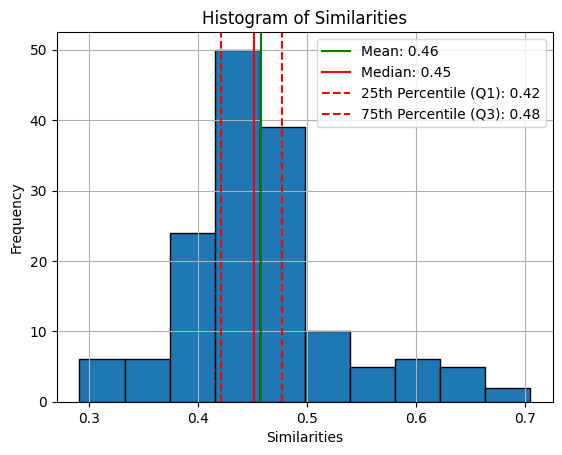

In [152]:
import matplotlib.pyplot as plt
from scipy import stats

# Display the histogram of your numpy array 'similarities'
plt.hist(similarities, bins=10, edgecolor='black')
plt.title('Histogram of Similarities')

# Calculate the mean, median, and quartiles
mean_value = np.mean(similarities)
median_value = np.median(similarities)
quartile1 = np.percentile(similarities, 25)
quartile3 = np.percentile(similarities, 75)

# Display the mean, median, and quartiles on the histogram
plt.axvline(mean_value, color='green', label='Mean: %.2f' % (mean_value), linestyle='-')
plt.axvline(median_value, color='red', label='Median: %.2f' % (median_value), linestyle='-')
plt.axvline(quartile1, color='red', label='25th Percentile (Q1): %.2f' % (quartile1), linestyle='--')
plt.axvline(quartile3, color='red', label='75th Percentile (Q3): %.2f' % (quartile3), linestyle='--')

# Set the x-axis limits to ensure the quartiles and mean are visible
#plt.xlim([0, 0.8])
#
# Customize the plot
plt.xlabel('Similarities')
plt.ylabel('Frequency')
plt.yscale('linear')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

In [124]:
print(chunk_strings[similarities.argmax()])

The Discipline Committee is charged with confirming what has occurred and recommending
consequences to the Head of School. The student’s faculty advisor (or another faculty member
at the student’s request) attends the committee meeting as an advocate and liaison. Parents do
not attend meetings of the Discipline Committee. The Head of School or other representative of
the School typically contacts parents within 24 hours with the School’s decision.
Violations of major school rules may result in a student’s probation, suspension, or dismissal
from the School. In some cases, parents may elect to withdraw their child from the School.
In cases leading to disciplinary probation, the student is expected to maintain a record of good
conduct during the probationary period. Depending on the violation, the Discipline Committee
may recommend further consequences, including, but not limited to, work hours, written
apologies, and financial restitution.


### Rank similarities

In [125]:
top_similarities = np.flip(np.argsort(similarities, axis=0))

In [126]:
print(top_similarities)

[ 86  81  85  82  80  90  87  20  84  18  91  19  77  89  28  24  12  10
  92 135  83  88  17  16  27  29  23  76  32  33  51  26  13  11   3   7
   8   9 138 137  21  73  93  34  78 107  74 113 144 116 133 108  95 130
  67  31 149  44  43  40 121 106 109  75  25 131  50 152  68  70 126  15
 117  49   6  30  72  96  66  42 115 112 151  79  22  52  99  14  45 134
 129 132 128 118  47  38  46 123  41   2 127   5 146 114  35  71   0  69
  36 125  94  57 148 111  54 120 136 105  97  48 124   4 145 143   1  53
  39  98 140 110 141 119 104 103 100 147 139  65 150 122  37 102 101  55
 142  61  63  60  56  64  58  62  59]


In [127]:
#top_selected = top_similarities[:6]

In [131]:
#threshold = np.percentile(similarities, 75)
top_selected = np.argwhere(similarities > 0.6).flatten()

In [132]:
threshold = np.percentile(similarities, 90)
#top_selected = np.argwhere(similarities > threshold).flatten()
len(top_selected)

9

In [133]:
print(top_selected)

[20 80 81 82 84 85 86 87 90]


### Build the context of similar chunks

coi is chunks of interest

In [134]:
coi = [chunk_strings[idx] for idx in top_selected]

In [135]:
#print(coi)

## Build the context

In [136]:
CONTEXT = ""
for i,p in enumerate(coi):
    CONTEXT += (p + "\n\n")

In [137]:
#print(CONTEXT)

## Build the prompt for the LLM

### Define the task

In [138]:
TASK = """
use the following CONTEXT to answer the QUESTION at the end.
If you do not know the answer, just say that you do not know, do not try to make up an any answers to the QUESTION
If you do do can get an answer from the CONTEXT provided, answer the QUESTION 
in simple terms in markdown format with five  bullet points each of 20 words or less
"""

In [139]:
prompt = f"""

TASK: {TASK}
CONTEXT: {CONTEXT}
QUESTION: {query}

"""

In [140]:
# print(prompt)

## Pass the prompt to our semi-local LLM

In [141]:
response = client.chat(model="llama3.2", messages=[{"role": "user", "content": prompt }])

In [142]:
print(response.message.content)

* The Discipline Committee is a panel of faculty members appointed by the Head of School.
* It makes recommendations to the Head of School in cases involving Major School Rule violations.
* Faculty members are appointed as part of this committee to recommend consequences.
* The student's faculty advisor (or another faculty member at the student's request) attends meetings as an advocate.
* Parents do not attend meetings, but the Head of School typically contacts them within 24 hours with the decision.
